 **importing libraries necessary for EDA and data preprocessing**

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

**loading the employee attrition prediction  dataset**

In [46]:
data = pd.read_csv('/content/Employee.csv')

In [47]:
data

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48693,21051,45,Female,31,Education,3658,Fair,Medium,High,1.0,...,2.0,Entry,Small,107,Yes,No,No,Poor,Low,Left
48694,8508,21,Male,12,Technology,10136,Excellent,Low,High,2.0,...,3.0,Senior,Medium,56,No,No,No,Good,Low,Stayed
48695,42965,57,Male,44,Education,5958,Good,High,Average,0.0,...,0.0,Entry,Small,97,No,No,No,Good,Low,Stayed
48696,20505,25,Male,1,Technology,8566,Excellent,Very High,Average,1.0,...,4.0,Senior,Medium,6,No,No,No,Good,Medium,Stayed


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48698 entries, 0 to 48697
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               48698 non-null  int64  
 1   Age                       48698 non-null  int64  
 2   Gender                    48698 non-null  object 
 3   Years at Company          48698 non-null  int64  
 4   Job Role                  48698 non-null  object 
 5   Monthly Income            48698 non-null  int64  
 6   Work-Life Balance         48694 non-null  object 
 7   Job Satisfaction          48698 non-null  object 
 8   Performance Rating        48694 non-null  object 
 9   Number of Promotions      48693 non-null  float64
 10  Overtime                  48698 non-null  object 
 11  Distance from Home        48698 non-null  int64  
 12  Education Level           48693 non-null  object 
 13  Marital Status            48694 non-null  object 
 14  Number

In [ ]:
data.shape

(48698, 24)

 ** count of unique values in the variables**

In [ ]:

data.nunique()

Employee ID                 48698
Age                            42
Gender                          2
Years at Company               51
Job Role                        5
Monthly Income               9295
Work-Life Balance               4
Job Satisfaction                4
Performance Rating              4
Number of Promotions            5
Overtime                        2
Distance from Home             99
Education Level                 5
Marital Status                  3
Number of Dependents            7
Job Level                       3
Company Size                    3
Company Tenure                127
Remote Work                     2
Leadership Opportunities        2
Innovation Opportunities        2
Company Reputation              4
Employee Recognition            4
Attrition                       3
dtype: int64

**Check for null values**

In [ ]:
data.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

In [ ]:
data.dtypes.value_counts()

object     16
int64       6
float64     2
Name: count, dtype: int64

# **Data Understanding and EDA**

**Attrition Rate**

In [ ]:
data["Attrition"].value_counts().reset_index()

,Attrition,count
0,Stayed,25570
1,Left,23127
2,Stay,1


In [ ]:
data["Employee ID"].nunique()

48698

# Years at Company

Text(0.5, 0.98, 'count by Years at company')

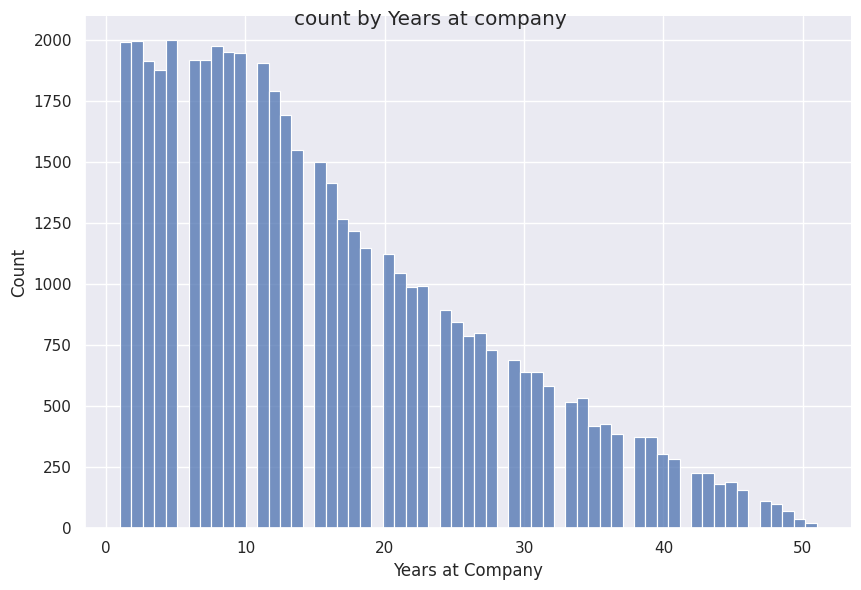

In [ ]:
sns.set_theme(rc={'figure.figsize':(8,5)}) # Figsize can be edited if charts are too large
ax1=sns.displot(data=data,x="Years at Company",bins=61,height=6, aspect=11.7/8)
ax1.figure.suptitle("count by Years at company")

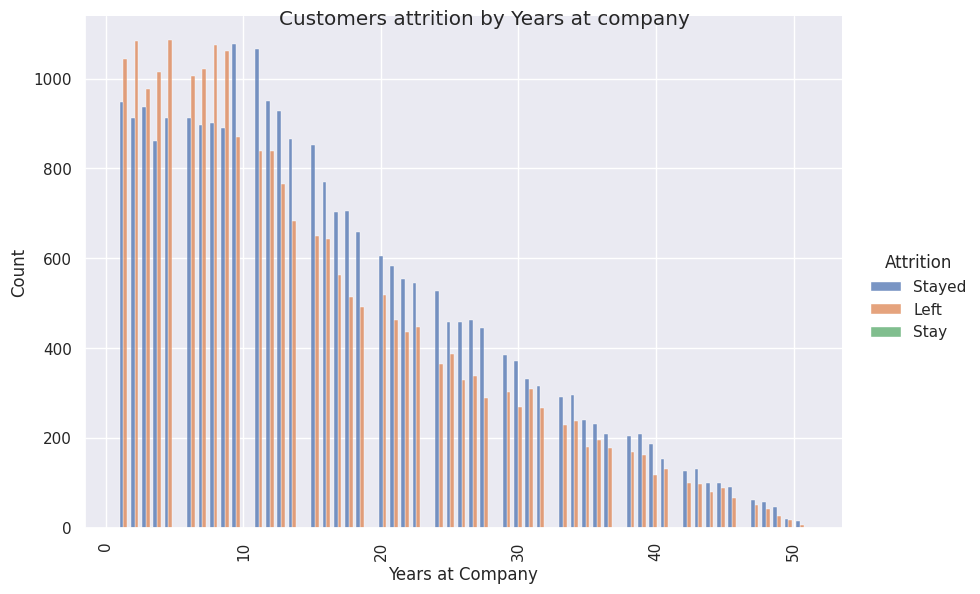

In [ ]:
ax2=sns.displot(data=data,x="Years at Company",bins=61,hue="Attrition", multiple='dodge',height=6, aspect=11.7/8)
ax2.tick_params(axis='x', rotation=90)
ax2.figure.suptitle("Customers attrition by Years at company")
plt.show()

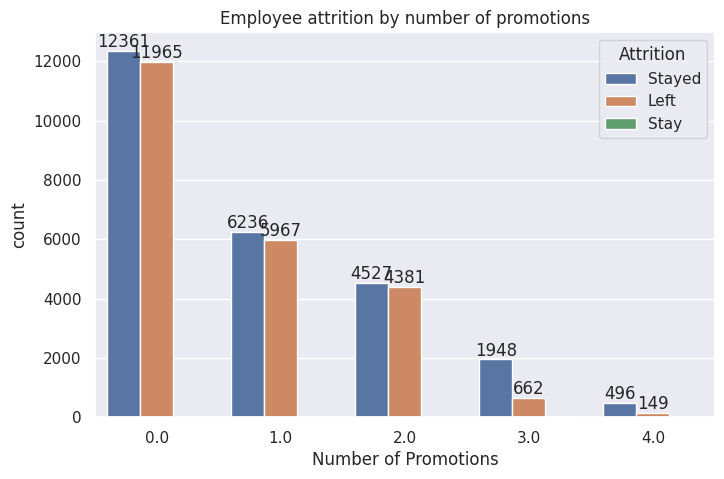

In [ ]:
ax3=sns.countplot(x="Number of Promotions",hue ='Attrition', data=data)
ax3.set_title("Employee attrition by number of promotions")
ax3.bar_label(ax3.containers[0])
ax3.bar_label(ax3.containers[1])
plt.show()

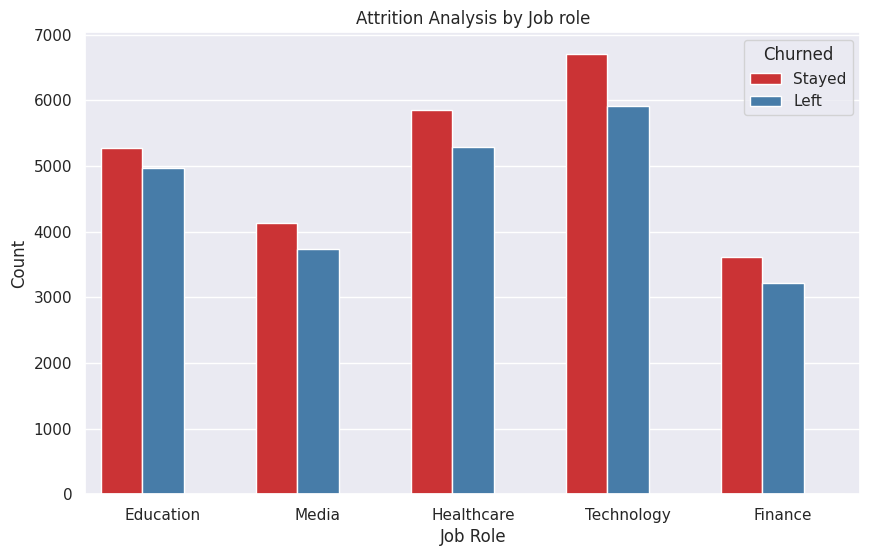

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Job Role', hue='Attrition', data=data, palette='Set1')
plt.title('Attrition Analysis by Job role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.legend(title='Churned', labels=['Stayed', 'Left'])
plt.show()

**Gender**

In [ ]:
gender_counts = data['Gender'].value_counts()
print(gender_counts)

Gender
Male      26710
Female    21988
Name: count, dtype: int64


In [ ]:
gender_churn_crosstab = pd.crosstab(data['Gender'], data['Attrition'])
print(gender_churn_crosstab)

Attrition   Left  Stay  Stayed
Gender                        
Female     11660     0   10328
Male       11467     1   15242


In [ ]:
data['Job Satisfaction'].describe()

count     48698
unique        4
top        High
freq      24335
Name: Job Satisfaction, dtype: object

In [ ]:
data['Job Satisfaction'].value_counts()

Job Satisfaction
High         24335
Very High     9906
Medium        9666
Low           4791
Name: count, dtype: int64

In [ ]:
data['Performance Rating'].value_counts()

Performance Rating
Average          29258
High              9734
Below Average     7299
Low               2403
Name: count, dtype: int64

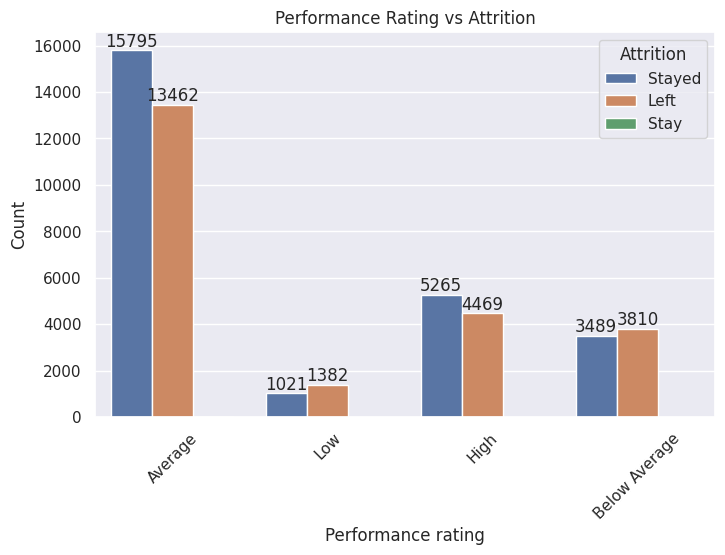

In [48]:
sns.countplot(x='Performance Rating', hue='Attrition', data=data)
plt.title('Performance Rating vs Attrition')
plt.xlabel('Performance rating')
plt.ylabel('Count')
pl1=plt.gca()
pl1.bar_label(pl1.containers[0])
pl1.bar_label(pl1.containers[1])
plt.xticks(rotation=45)
plt.show()

In [49]:
data['Work-Life Balance'].value_counts()

Work-Life Balance
Good         18405
Fair         14777
Excellent     8760
Poor          6752
Name: count, dtype: int64

In [51]:
data['Marital Status'].value_counts()

Marital Status
Married     24481
Single      16982
Divorced     7231
Name: count, dtype: int64

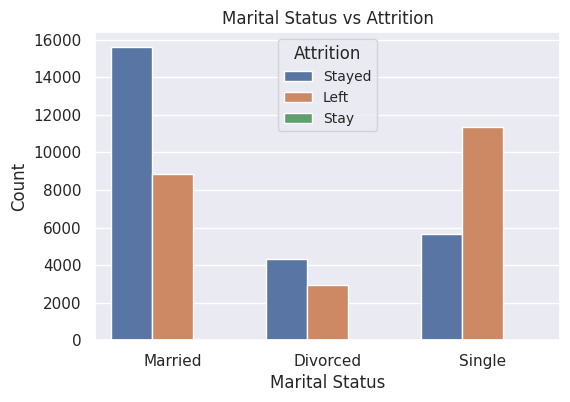

In [54]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Marital Status', hue='Attrition')
plt.title('Marital Status vs Attrition')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Attrition',fontsize='small')
plt.show()

**Data Preprocessing**

Finding Missing Values

In [55]:
data.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

Fill Missing values

In [82]:
data['Performance Rating'].fillna(data['Performance Rating'].mode()[0], inplace=True)
data['Job Satisfaction'].fillna(data['Job Satisfaction'].mode()[0], inplace=True)
data['Work-Life Balance'].fillna(data['Work-Life Balance'].mode()[0], inplace=True)
data['Company Size'].fillna(data['Company Size'].mode()[0], inplace=True)
data['Education Level'].fillna(data['Education Level'].mode()[0], inplace=True)
data['Employee Recognition'].fillna(data['Employee Recognition'].mode()[0], inplace=True)
data['Remote Work'].fillna(data['Remote Work'].mode()[0], inplace=True)
data['Job Level'].fillna(data['Job Level'].mode()[0], inplace=True)
data['Marital Status'].fillna(data['Marital Status'].mode()[0], inplace=True)
data['Number of Dependents'].fillna(data['Number of Dependents'].median(), inplace=True)
data['Number of Promotions'].fillna(data['Number of Promotions'].median(), inplace=True)
data.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

check for outliers

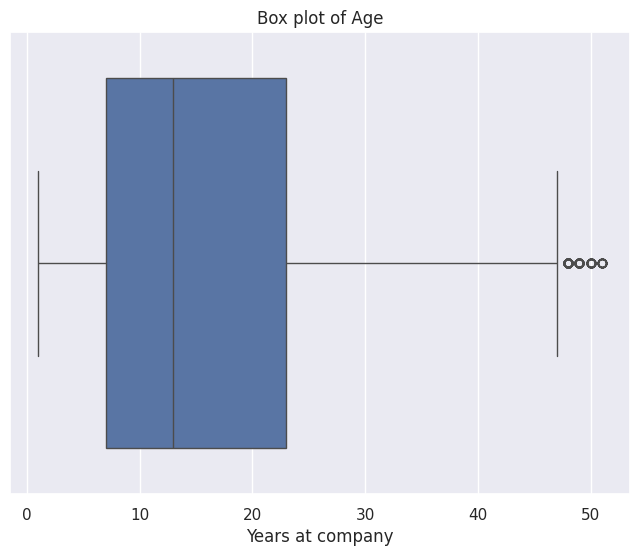

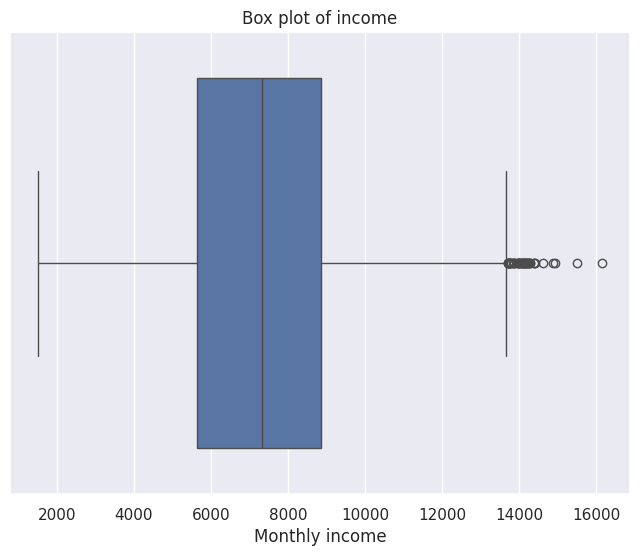

In [88]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Years at Company'])
plt.title('Box plot of Age')
plt.xlabel('Years at company')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Monthly Income'])
plt.title('Box plot of income')
plt.xlabel('Monthly income')
plt.show()


In [91]:
Q1 = data['Years at Company'].quantile(0.25)
Q3 = data['Years at Company'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_years = Q1 - 1.5 * IQR
upper_bound_years = Q3 + 1.5 * IQR
data_filtered_years = data[(data['Years at Company'] >= lower_bound_years) & (data['Years at Company'] <= upper_bound_years)]
Q1_income = data['Monthly Income'].quantile(0.25)
Q3_income = data['Monthly Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income
data_filtered_income = data[(data['Monthly Income'] >= lower_bound_income) & (data['Monthly Income'] <= upper_bound_income)]

# **Encoding**

In [92]:
# Select categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

In [95]:
# Creating a label encoder object
le = LabelEncoder()

# Applying label encoding to each specified column
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

Feature selection

In [96]:
from sklearn.feature_selection import chi2

In [98]:
X = data[['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition']].values
y = data['Attrition']

# Apply Chi-Square test
chi2_values, p_values = chi2(X, y)

# Create a DataFrame to display the results
chi2_df = pd.DataFrame({'Feature': ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
                        'Chi2 Value': chi2_values,
                        'p-value': p_values})

# Sort by Chi2 value in descending order
chi2_df = chi2_df.sort_values(by='Chi2 Value', ascending=False)

print(chi2_df)

                     Feature   Chi2 Value        p-value
8                  Job Level  3414.925320   0.000000e+00
10               Remote Work  1929.464230   0.000000e+00
7             Marital Status   974.707579  2.212782e-212
0                     Gender   222.936191   3.890641e-49
3           Job Satisfaction   140.112371   3.758246e-31
2          Work-Life Balance   110.366272   1.082103e-24
6            Education Level    99.421797   2.575319e-22
5                   Overtime    96.354832   1.193477e-21
4         Performance Rating    68.556792   1.297423e-15
13        Company Reputation    33.670983   4.880214e-08
9               Company Size    19.567290   5.636598e-05
12  Innovation Opportunities    19.323067   6.368677e-05
1                   Job Role     5.006741   8.180878e-02
11  Leadership Opportunities     4.977275   8.302301e-02
14      Employee Recognition     0.149729   9.278694e-01


selecting feature with high chi 2 value

# **Scaling and model building**

In [99]:
# Selected features for Model Building.
Features = ['Joblevel','Remote Work','Marital Status','Gender', 'Job Satisfaction', 'Company Tenure']

In [100]:
from sklearn.model_selection import train_test_split

X= data.drop(columns=['Attrition'])
y= data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [105]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7435728952772074
[[4251 1537]
 [1585 4802]]
